In [ ]:


import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.19.0
GPU detected: []


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/NER/crime_01.csv", encoding="latin1")

data.head(26)

,Sentence number,Word,Tag
0,1,On,O
1,1,June,B-TI
2,1,2,M-TI
3,1,2024,E-TI
4,1,Laura,B-VI
5,1,Green,E-VI
6,1,was,O
7,1,found,O
8,1,murder,S-TY
9,1,in,O


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-2726748901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")


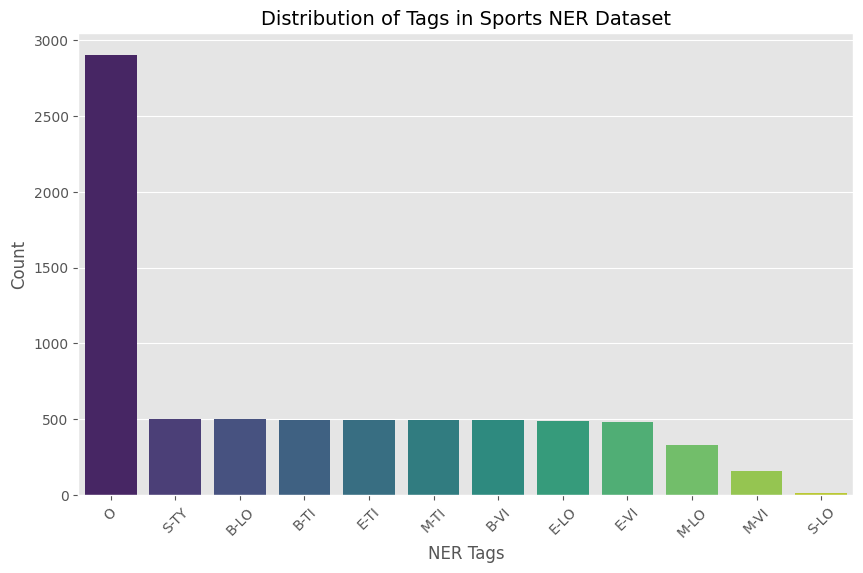

In [ ]:
# 1. Distribution of Tags
plt.figure(figsize=(10,6))
tag_counts = data['Tag'].value_counts()
sns.barplot(x=tag_counts.index, y=tag_counts.values, palette="viridis")
plt.title("Distribution of Tags in Sports NER Dataset", fontsize=14)
plt.xlabel("NER Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

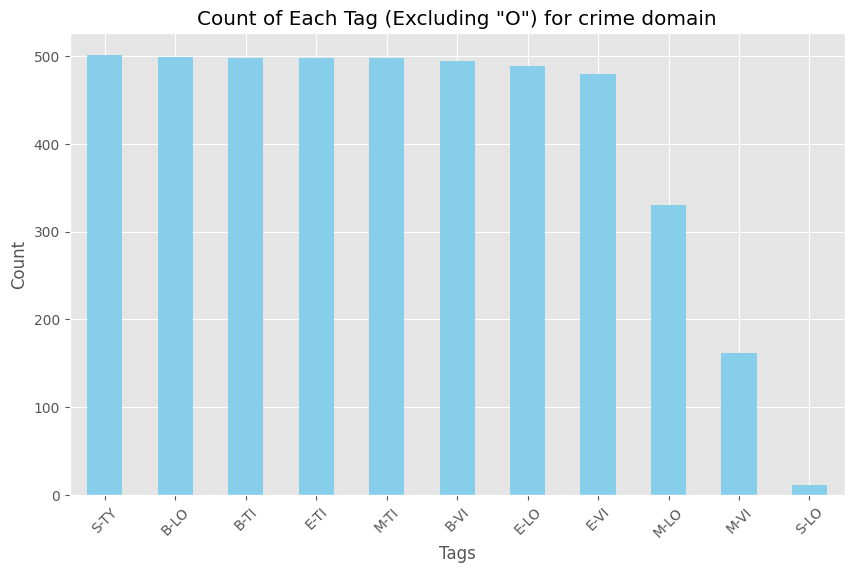

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
tag_to_ignore = 'O'
#Filter out the specific tag
filtered_df = data[data['Tag'] != tag_to_ignore]
# Count the occurrences of each tag
tag_counts = filtered_df['Tag'].value_counts()
# Create the bar chart
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Tag (Excluding "{}") for crime domain'.format(tag_to_ignore))
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
print("Unique words in corpus:", data['Word'].nunique())
print("Unique tags in corpus:", data['Tag'].nunique())

Unique words in corpus: 1002
Unique tags in corpus: 12


In [ ]:
words = list(set(data["Word"].values))
words

['Pratt',
 'Wolfe',
 'Ivy',
 'House',
 'Judah',
 'Holloway',
 'Gill',
 'Little',
 'Station',
 'dormitory',
 '3rd',
 'Lillian',
 'Jessica',
 'Pruitt',
 'Patel',
 'Walker',
 'Matthew',
 'Ramos',
 'Bismarck',
 'Preserve',
 'dorm',
 'Monroe',
 'Eli',
 '6th',
 'Morgan',
 'ethan',
 'Ian',
 'Cahaba',
 'class',
 'Reno',
 'Nico',
 '12',
 'Bass',
 'him',
 'Chris',
 'lake',
 'Cummings',
 'Victoria',
 'Jackson',
 'Buffalo',
 'driver',
 'be',
 'Derek',
 'Charleston',
 '2024',
 'Emma',
 'emily',
 'amusement',
 'rest',
 'Cook',
 'Sanders',
 'Canyon',
 'Drake',
 'December',
 'businessman',
 'child',
 'Port',
 'Pines',
 'Morris',
 'Colton',
 'Florence',
 'Henry',
 'Dorsey',
 'Susan',
 '27',
 'April',
 'Modesto',
 'grandmother',
 'Evans',
 'Auburn',
 'Campbell',
 'apartment',
 'beach',
 'Oxnard',
 'carjacking',
 'concert',
 'police',
 'Santa',
 'mother',
 'executive',
 'Pace',
 'anna',
 'Sharp',
 '911',
 'grocery',
 'Violet',
 'Brielle',
 'in',
 'Moss',
 'Hernandez',
 'November',
 'Flores',
 'after',
 '

In [ ]:
data['Tag'].unique()

array(['O', 'B-TI', 'M-TI', 'E-TI', 'B-VI', 'E-VI', 'S-TY', 'B-LO',
       'E-LO', 'M-LO', 'M-VI', 'S-LO'], dtype=object)

In [ ]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
num_words

1003

In [ ]:
tags = list(set(data['Tag'].values))
num_tags = len(tags)

In [ ]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
                                                           s['Tag'].values.tolist())]
        self.grouped = self.data.groupby("Sentence number").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(data)
sentences = getter.sentences

/tmp/ipython-input-1777737471.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence number").apply(agg_func)


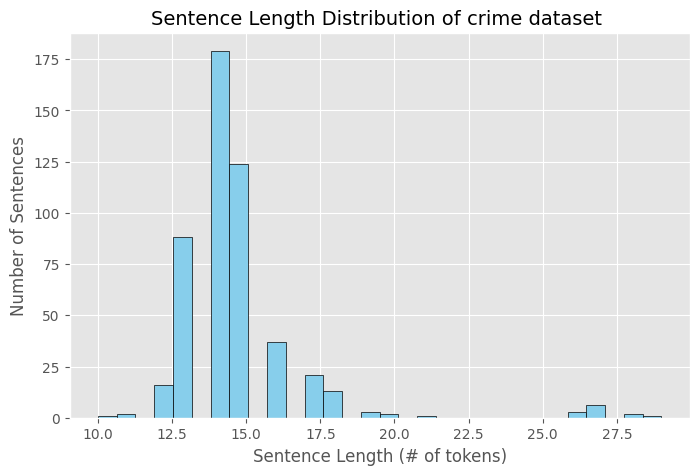

In [ ]:
# 2. Sentence Length Distribution
sentence_lengths = [len(s) for s in sentences]
plt.figure(figsize=(8,5))
plt.hist(sentence_lengths, bins=30, color="skyblue", edgecolor="black")
plt.title("Sentence Length Distribution of crime dataset ", fontsize=14)
plt.xlabel("Sentence Length (# of tokens)")
plt.ylabel("Number of Sentences")
plt.show()

In [ ]:
sentences[0]

[('On', 'O'),
 ('June', 'B-TI'),
 ('2', 'M-TI'),
 ('2024', 'E-TI'),
 ('Laura', 'B-VI'),
 ('Green', 'E-VI'),
 ('was', 'O'),
 ('found', 'O'),
 ('murder', 'S-TY'),
 ('in', 'O'),
 ('her', 'O'),
 ('home', 'B-LO'),
 ('The', 'O'),
 ('police', 'O'),
 ('suspect', 'O'),
 ('foul', 'O'),
 ('play', 'O')]

In [ ]:
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [ ]:
word2idx

{'Pratt': 1,
 'Wolfe': 2,
 'Ivy': 3,
 'House': 4,
 'Judah': 5,
 'Holloway': 6,
 'Gill': 7,
 'Little': 8,
 'Station': 9,
 'dormitory': 10,
 '3rd': 11,
 'Lillian': 12,
 'Jessica': 13,
 'Pruitt': 14,
 'Patel': 15,
 'Walker': 16,
 'Matthew': 17,
 'Ramos': 18,
 'Bismarck': 19,
 'Preserve': 20,
 'dorm': 21,
 'Monroe': 22,
 'Eli': 23,
 '6th': 24,
 'Morgan': 25,
 'ethan': 26,
 'Ian': 27,
 'Cahaba': 28,
 'class': 29,
 'Reno': 30,
 'Nico': 31,
 '12': 32,
 'Bass': 33,
 'him': 34,
 'Chris': 35,
 'lake': 36,
 'Cummings': 37,
 'Victoria': 38,
 'Jackson': 39,
 'Buffalo': 40,
 'driver': 41,
 'be': 42,
 'Derek': 43,
 'Charleston': 44,
 '2024': 45,
 'Emma': 46,
 'emily': 47,
 'amusement': 48,
 'rest': 49,
 'Cook': 50,
 'Sanders': 51,
 'Canyon': 52,
 'Drake': 53,
 'December': 54,
 'businessman': 55,
 'child': 56,
 'Port': 57,
 'Pines': 58,
 'Morris': 59,
 'Colton': 60,
 'Florence': 61,
 'Henry': 62,
 'Dorsey': 63,
 'Susan': 64,
 '27': 65,
 'April': 66,
 'Modesto': 67,
 'grandmother': 68,
 'Evans': 69,
 '

In [ ]:
tag2idx

{'M-TI': 0,
 'O': 1,
 'M-LO': 2,
 'M-VI': 3,
 'S-TY': 4,
 'E-LO': 5,
 'S-LO': 6,
 'E-TI': 7,
 'B-LO': 8,
 'E-VI': 9,
 'B-VI': 10,
 'B-TI': 11}

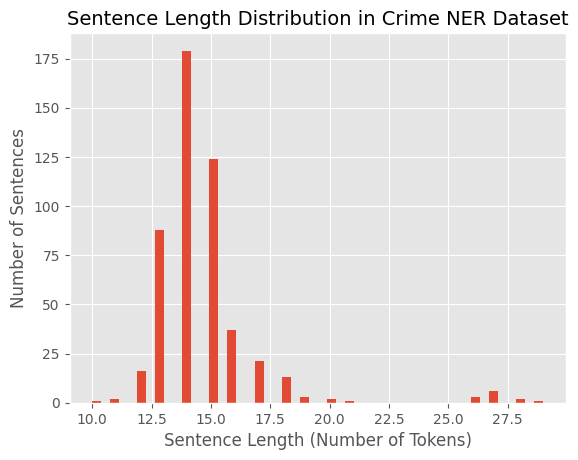

In [ ]:
plt.hist([len(s) for s in sentences], bins=50)
# Add title and axis labels
plt.title("Sentence Length Distribution in Crime NER Dataset", fontsize=14)
plt.xlabel("Sentence Length (Number of Tokens)", fontsize=12)
plt.ylabel("Number of Sentences", fontsize=12)
plt.show()

In [ ]:
lengths = [len(s) for s in sentences]
for max_len in [20, 25, 30, 40, 50]:
    covered = sum(l <= max_len for l in lengths) / len(lengths) * 100
    print(f"Max length {max_len}: covers {covered:.2f}% of sentences")


Max length 20: covers 97.39% of sentences
Max length 25: covers 97.60% of sentences
Max length 30: covers 100.00% of sentences
Max length 40: covers 100.00% of sentences
Max length 50: covers 100.00% of sentences


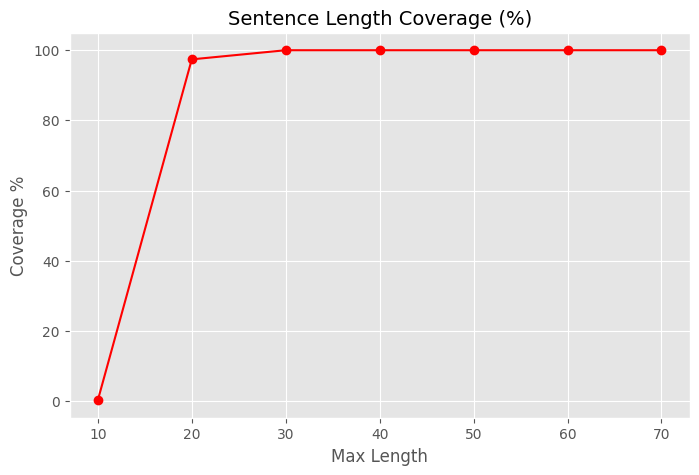

In [ ]:
# 3. Sentence Length Coverage Curve
coverage = []
max_lengths = [10, 20, 30, 40, 50, 60, 70]
for ml in max_lengths:
    covered = sum(l <= ml for l in sentence_lengths) / len(sentence_lengths) * 100
    coverage.append(covered)

plt.figure(figsize=(8,5))
plt.plot(max_lengths, coverage, marker="o", color="red")
plt.title("Sentence Length Coverage (%)", fontsize=14)
plt.xlabel("Max Length")
plt.ylabel("Coverage %")
plt.grid(True)
plt.show()

/tmp/ipython-input-1303575666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word", y="Frequency", data=df_freq, palette="mako")


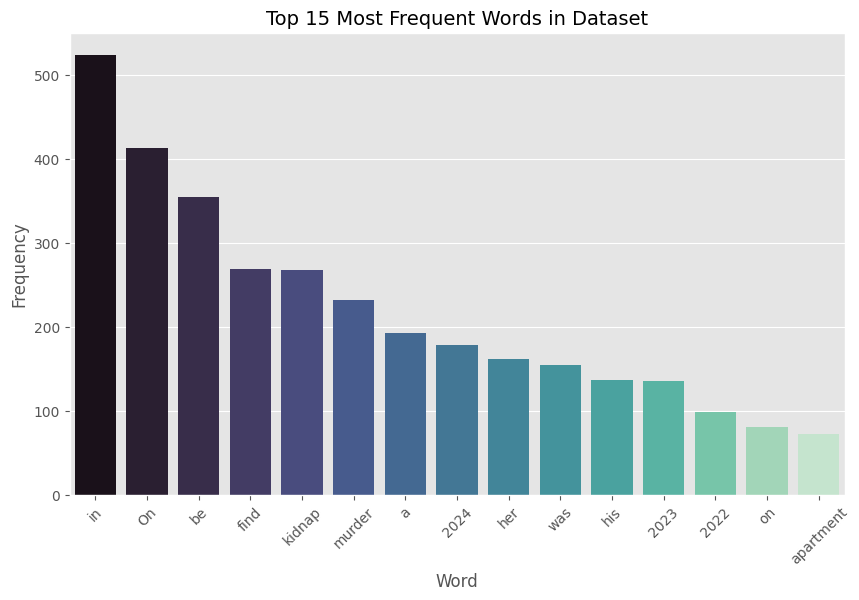

In [ ]:
# 4. Top 15 Frequent Words
from collections import Counter
word_freq = Counter(data['Word'])
common_words = word_freq.most_common(15)
df_freq = pd.DataFrame(common_words, columns=["Word","Frequency"])

plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Frequency", data=df_freq, palette="mako")
plt.title("Top 15 Most Frequent Words in Dataset", fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=num_words-1)

y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [ ]:
input_word = Input(shape=(max_len,))
model = Embedding(input_dim=num_words, output_dim=50, input_length=max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 50, 50)         │        50,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 50, 50)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 200)        │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 50, 12)         │         2,412 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,362 (677.20 KB)

 Trainable params: 173,362 (677.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
!pip install livelossplot

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

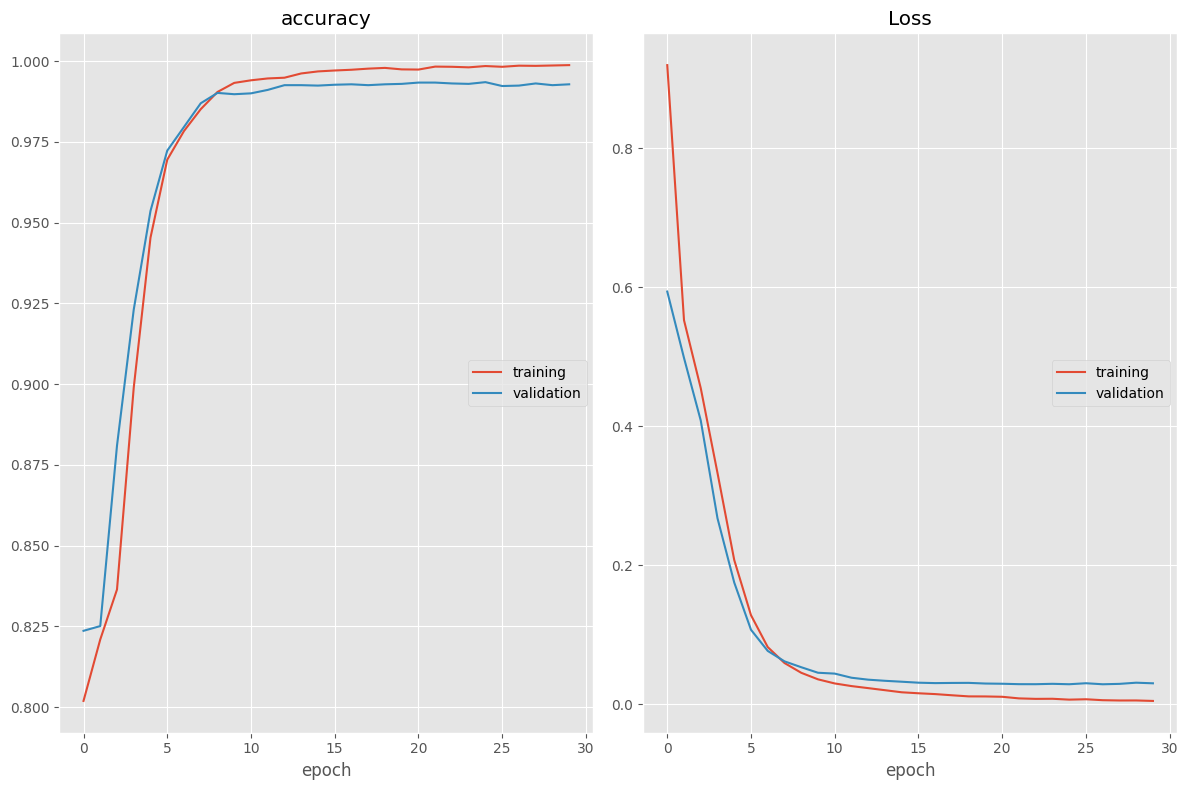

accuracy
	training         	 (min:    0.802, max:    0.999, cur:    0.999)
	validation       	 (min:    0.824, max:    0.993, cur:    0.993)
Loss
	training         	 (min:    0.005, max:    0.920, cur:    0.005)
	validation       	 (min:    0.029, max:    0.594, cur:    0.030)

Epoch 30: val_loss did not improve from 0.02891
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 221ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9928 - val_loss: 0.0303


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

# Define callbacks
chkpt = ModelCheckpoint("/content/model_weights_crime_500_final.weights.h5",  # Change the file name to end with .weights.h5
                        monitor='val_loss',
                        save_best_only=True,
                        save_weights_only=True,
                        mode='min',
                        verbose=1)

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=10,
                               verbose=0,
                               mode='max',
                               baseline=None,
                               restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

# Fit the model
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=8,
    epochs=30,
    callbacks=callbacks,
    verbose=1
)


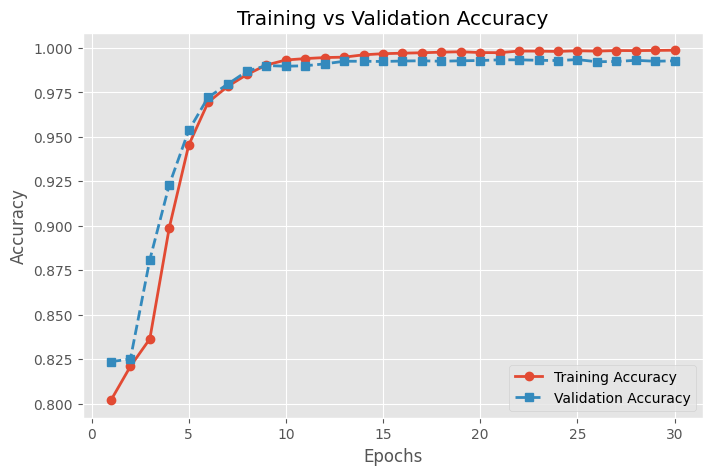

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_acc, linestyle='-', linewidth=2, marker='o', label='Training Accuracy')
plt.plot(epochs, val_acc, linestyle='--', linewidth=2, marker='s', label='Validation Accuracy')

plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


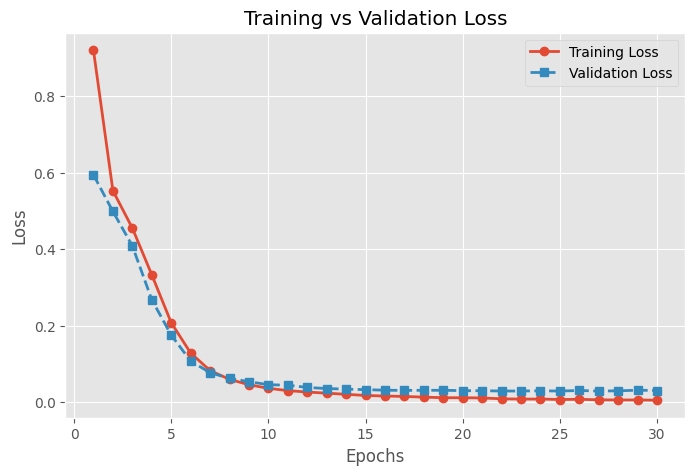

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, linestyle='-', linewidth=2, marker='o', label='Training Loss')
plt.plot(epochs, val_loss, linestyle='--', linewidth=2, marker='s', label='Validation Loss')

plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9924 - loss: 0.0344


[0.030288241803646088, 0.9928001165390015]

In [ ]:
i = np.random.randint(0, x_test.shape[0]) #659
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Word           True 	 Pred

------------------------------
On             O	O
July           B-TI	B-TI
7              M-TI	M-TI
2023           E-TI	E-TI
Samuel         B-VI	B-VI
Rivera         M-VI	M-VI
Brooks         E-VI	E-VI
be             O	O
find           O	O
kidnap         S-TY	S-TY
in             O	O
his            O	O
Atlanta        B-LO	B-LO
penthouse      E-LO	E-LO
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         O	O
Olivia         

In [ ]:
from sklearn.metrics import f1_score

# Calculate F1 scores
f1_macro = f1_score(y_true, p[0], average='macro')
f1_micro = f1_score(y_true, p[0], average='micro')

# Print F1 scores
print("f1_macro:", f1_macro)
print("f1_micro:", f1_micro)


f1_macro: 1.0
f1_micro: 1.0


In [ ]:
model.save('/content/model_crime_500_final.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Flatten predictions and true labels (ignoring padding)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

# Create inverse tag map for decoding
idx2tag = {i: t for t, i in tag2idx.items()}

# Initialize lists to store actual and predicted tags
y_pred_flat = []
y_true_flat = []

for i in range(len(y_test)):
    for j in range(len(y_test[i])):
        true_tag = y_test[i][j]
        pred_tag = y_pred[i][j]

        if true_tag != tag2idx['O']:  # Ignore padding / 'O' tag
            y_true_flat.append(idx2tag[true_tag])
            y_pred_flat.append(idx2tag[pred_tag])


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


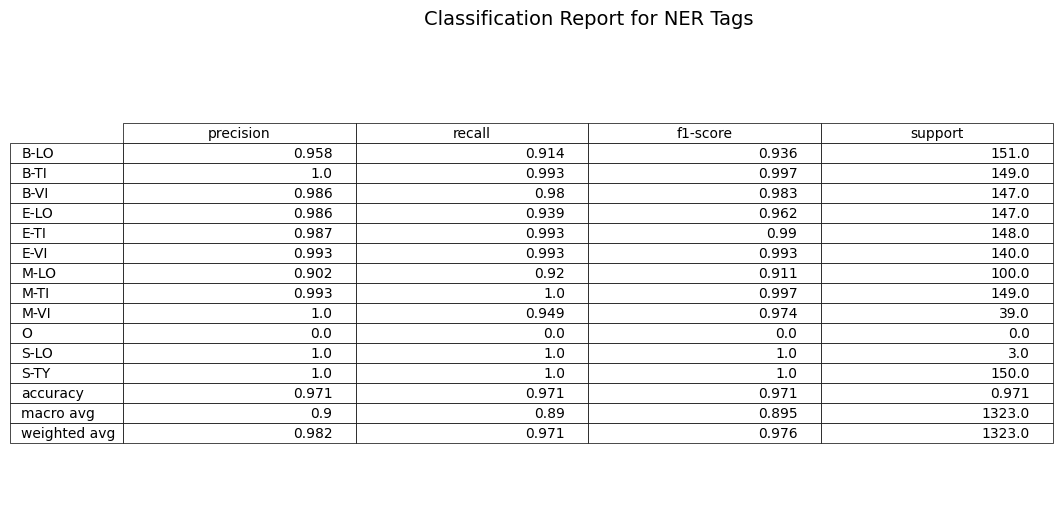

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Generate classification report as dict
report_dict = classification_report(y_true_flat, y_pred_flat, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round values
report_df = report_df.round(3)

# Plot as a table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=report_df.values,
                 colLabels=report_df.columns,
                 rowLabels=report_df.index,
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title("Classification Report for NER Tags", fontsize=14, pad=20)
plt.show()


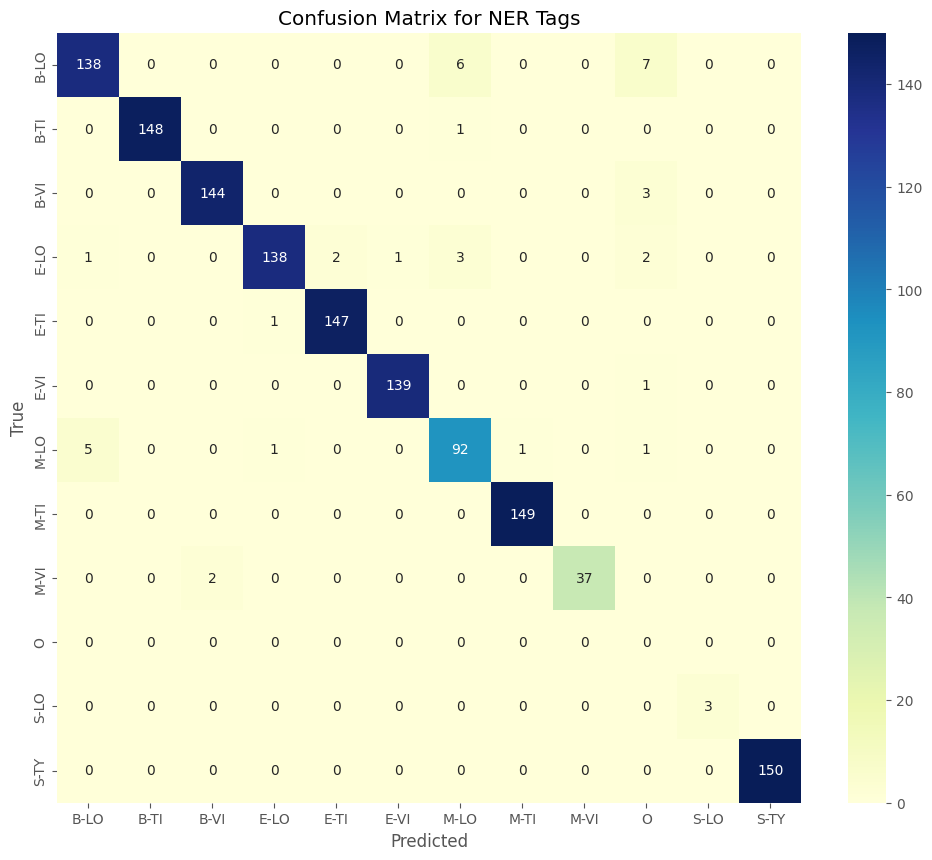

In [ ]:


# Compute confusion matrix
labels = sorted(list(set(y_true_flat + y_pred_flat)))
cm = confusion_matrix(y_true_flat, y_pred_flat, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for NER Tags")
plt.show()

In [ ]:
# Print overall metrics
print("Accuracy:", accuracy_score(y_true_flat, y_pred_flat))


Accuracy: 0.9712773998488284


In [ ]:
print("Precision (macro):", precision_score(y_true_flat, y_pred_flat, average='macro'))
print("Recall (macro):", recall_score(y_true_flat, y_pred_flat, average='macro'))
print("F1 Score (macro):", f1_score(y_true_flat, y_pred_flat, average='macro'))

Precision (macro): 0.900423119218574
Recall (macro): 0.8900317964274458
F1 Score (macro): 0.8950683996007668


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Precision (micro):", precision_score(y_true_flat, y_pred_flat, average='micro'))
print("Recall (micro):", recall_score(y_true_flat, y_pred_flat, average='micro'))
print("F1 Score (micro):", f1_score(y_true_flat, y_pred_flat, average='micro'))

Precision (micro): 0.9712773998488284
Recall (micro): 0.9712773998488284
F1 Score (micro): 0.9712773998488284


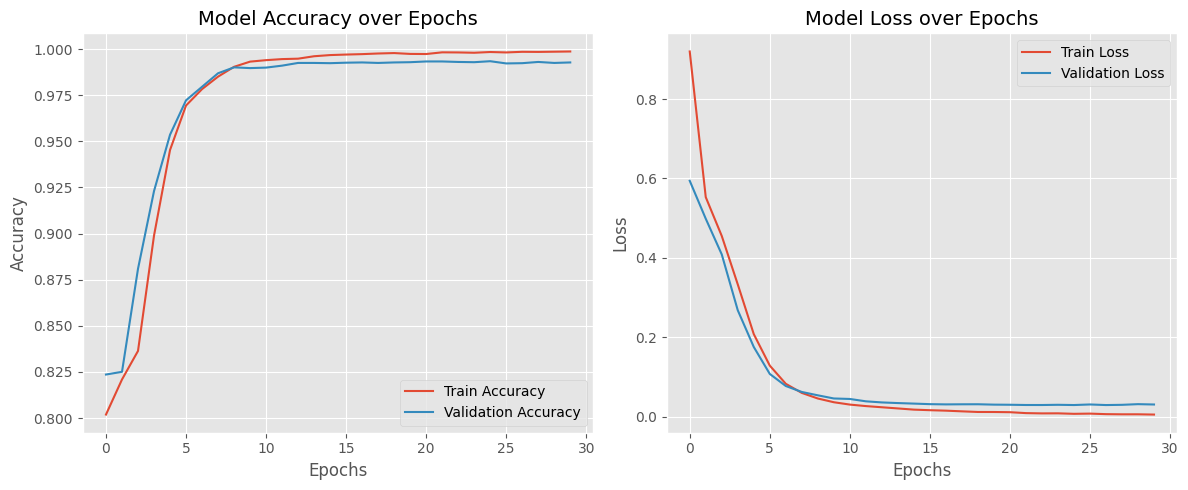

In [ ]:
# =======================
# 📈 TRAINING VISUALIZATION
# =======================

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy over Epochs", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss over Epochs", fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# =======================
# 📋 QUALITATIVE EXAMPLES
# =======================
sample_preds = []
for w, true, pred in zip(x_test[i], y_true, p[0]):
    if w != num_words-1:  # Ignore padding
        sample_preds.append([words[w-1], tags[true], tags[pred]])

pred_df = pd.DataFrame(sample_preds, columns=["Word","True Tag","Predicted Tag"])
pred_df.head(20)


,Word,True Tag,Predicted Tag
0,a,O,O
1,man,B-TI,B-TI
2,named,M-TI,M-TI
3,David,E-TI,E-TI
4,Clark,B-VI,B-VI
5,was,M-VI,M-VI
6,found,E-VI,E-VI
7,murder,O,O
8,in,O,O
9,his,S-TY,S-TY
